# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Sowdamini

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### https://github.com/SowdaminiKosuru/602-Mod7

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

### Question-1

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from collections import Counter
from matplotlib import pyplot as plt

article_site = requests.get('https://www.resumecoach.com/certifications-resume/')
html_page = article_site.text

print(article_site.status_code)
print(article_site.headers['content-type'])

with open('article.pkl', 'wb') as f:
    pickle.dump(article_site.text, f)

200
text/html; charset=UTF-8


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

### Question-2

In [2]:
def sentence_count(doc): #Code to have total no of sentences
    sentences = list(doc.sents)
    count=0
    for sentence in sentences:
        count += 1
    print('Count of total sentences in article:',count)


#open the pkl file
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)
    
#using get_text() to have article's text
soup = BeautifulSoup(article_html, 'html.parser')
article_element = soup.find('article')

#Code for Polarity using Sentiment Analysis
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text().lower())
print(f'Polarity: {doc._.polarity}')

sentence_count(doc)

Polarity: 0.18005782026615358
Count of total sentences in article: 44


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

### Question-3

In [3]:
def not_space_pun_stop(token):
    return not (token.is_space or token.is_punct or token.is_stop)

without_space_punct = [token for token in doc if not_space_pun_stop(token)]
#print(without_space_punct)

word_freq_tokens = Counter(map(str,without_space_punct))
print(word_freq_tokens.most_common(5))

token_set = set()
for token, freq in word_freq_tokens.most_common(5):
    token_set.add(token)
print('Frequent Token Set:',token_set)

[('certifications', 40), ('certification', 38), ('resume', 23), ('skills', 14), ('job', 13)]
Frequent Token Set: {'skills', 'resume', 'certification', 'certifications', 'job'}


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

### Question-4

In [4]:
lemmas = [token.lemma_ for token in doc if not_space_pun_stop(token)]
lemma_freq = Counter(lemmas)
print(lemma_freq.most_common(5))

lemma_set = set()
for lemma, freq in lemma_freq.most_common(5):
    lemma_set.add(lemma)
print('Frequent Lemma Set:',lemma_set)

[('certification', 78), ('resume', 23), ('skill', 15), ('section', 14), ('list', 13)]
Frequent Lemma Set: {'list', 'resume', 'certification', 'section', 'skill'}


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question-5

[0.09803921568627451, 0.125, 0.13043478260869565, 0.08695652173913043, 0.05263157894736842, 0.05714285714285714, 0.0, 0.13333333333333333, 0.13333333333333333, 0.08888888888888889, 0.14285714285714285, 0.038461538461538464, 0.0425531914893617, 0.07142857142857142, 0.08080808080808081, 0.0546875, 0.06451612903225806, 0.0, 0.0, 0.11627906976744186, 0.109375, 0.13333333333333333, 0.0, 0.05172413793103448, 0.060240963855421686, 0.06382978723404255, 0.03333333333333333, 0.018867924528301886, 0.08695652173913043, 0.09433962264150944, 0.14285714285714285, 0.0, 0.0967741935483871, 0.05660377358490566, 0.07692307692307693, 0.06666666666666667, 0.13793103448275862, 0.0, 0.046875, 0.0, 0.0, 0.014705882352941176, 0.06976744186046512, 0.08]


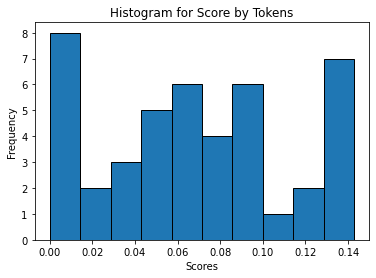

In [5]:
def score_sentence(doc, common_5_set): #Finding the Score for sentences using tokens,lemmas
    score_list = []
    sentence_score_map = {}
    sentences = list(doc.sents)
    for sentence in sentences:
        count = 0
        total_count =0
        for token in sentence:
            if token.lemma_ in common_5_set:
                count += 1
            total_count += 1 
        score = count/total_count
        score_list.append(score)
        sent_str = str(sentence).replace('\n','').replace('  ',' ')
        sentence_score_map[sent_str] = score
    return score_list, sentence_score_map
                
score_list_token, sentence_score_token  = score_sentence(doc,token_set)
print(score_list_token)

fig, ax = plt.subplots(1, 1)
ax.hist(score_list_token,edgecolor = 'black')
# Set title
ax.set_title("Histogram for Score by Tokens")

  
# adding labels
ax.set_xlabel('Scores')
ax.set_ylabel('Frequency')

plt.show()

### As from histogram, Most Commom Frequency ranges from 0.0 to 0.15 score range. If we are not considering the 0.0, then next we have a range of scores from 0.13 to 0.14.

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

### Question-6

[0.09803921568627451, 0.125, 0.17391304347826086, 0.2608695652173913, 0.05263157894736842, 0.08571428571428572, 0.05555555555555555, 0.13333333333333333, 0.13333333333333333, 0.06666666666666667, 0.14285714285714285, 0.07692307692307693, 0.02127659574468085, 0.07142857142857142, 0.08080808080808081, 0.0625, 0.06451612903225806, 0.0, 0.0, 0.11627906976744186, 0.140625, 0.13333333333333333, 0.0, 0.034482758620689655, 0.07228915662650602, 0.0851063829787234, 0.03333333333333333, 0.0, 0.17391304347826086, 0.1320754716981132, 0.19047619047619047, 0.0, 0.06451612903225806, 0.1320754716981132, 0.1282051282051282, 0.26666666666666666, 0.13793103448275862, 0.0, 0.0625, 0.0, 0.0, 0.014705882352941176, 0.11627906976744186, 0.1]


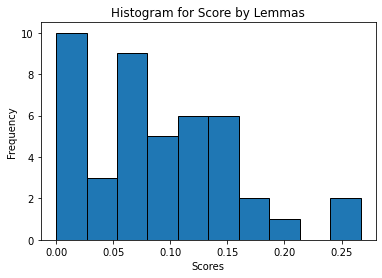

In [6]:
score_list_lemma, sentence_score_lemma = score_sentence(doc,lemma_set)
print(score_list_lemma)

fig, ax = plt.subplots(1, 1)
ax.hist(score_list_lemma,edgecolor = 'black')
# Set title
ax.set_title("Histogram for Score by Lemmas")
  
# adding labels
ax.set_xlabel('Scores')
ax.set_ylabel('Frequency')

plt.show()

### From the histogram i can see the scores ranges are different and the frequency also has changed. The most frequency is from 0.0 to 0.025, which includes 0.0. After ignoring the 0.0 values, we could say that scores >0.05 to <0.10 range has most frequency.

### Question-7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.13
* Cutoff Score (lemmas):0.14

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

### Question-8

In [7]:
cutoff_score_tokens = 0.13
summary_sentence = []

for i in sentence_score_token:
    if sentence_score_token[i] > cutoff_score_tokens:
        summary_sentence.append(i)

summary_token = ' '.join(summary_sentence)
print(summary_token)

how should you list certifications on your resume to make sure they are seen and make the right impression?what is a resume certification section?if you’ve been working on your resume, you might have noticed an optional section called “licenses and certifications.” always include the license number.what are the best certifications to put on your resume? determining which certifications look good on a resume largely depends on your career goals. ask about company programs promoting certification. if the job advertisement lists a certification as a requirement, you are not likely to get the job without it.what if you don’t have the certification listed? simply add the words “in progress” following the certification name.where on your resume should the certifications section reside? ”now, let’s take a look at a real-world example of a resume with certifications.sample resume with certificationscheck out this certifications on a resume example.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

### Question-9

In [8]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc2 = nlp(summary_token)
print(f'Polarity for Sentences with Tokens: {doc2._.polarity}')

sentence_count(doc2)

Polarity for Sentences with Tokens: 0.3375
Count of total sentences in article: 6


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Question-10

In [9]:
cutoff_score_lemma = 0.14
summary_sentence = []

for j in sentence_score_lemma:
    if sentence_score_lemma[j] > cutoff_score_lemma:
        summary_sentence.append(j)
        
summary_lemma = ' '.join(summary_sentence)
print(summary_lemma)

how should you list certifications on your resume to make sure they are seen and make the right impression?what is a resume certification section?if you’ve been working on your resume, you might have noticed an optional section called “licenses and certifications.” this section is not required like the skills, work experience, and education sections are.what does the certifications resume section contain? ask about company programs promoting certification. at other times, the certifications section can strengthen your resume and increase your chances of getting the job.there are three categories of circumstances when you should always give attention to adding certifications to your resume.when specific certifications are requiredwhen a company specifies that applicants must have a certain certification or a range of certifications, the certification section becomes the most vital. if you have the right certifications, however, an employer might overlook your lack of experience, confide

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Question-11

In [10]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc1 = nlp(summary_lemma)
print(f'Polarity for Sentences with Lemmas: {doc1._.polarity}')

sentence_count(doc1)

Polarity for Sentences with Lemmas: 0.16428571428571428
Count of total sentences in article: 7


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

## Question-12

### Initial article Polarity: 0.18005782026615358 Polarity for Sentences with Lemmas: 0.16428571428571428 Polarity for Sentences with Tokens: 0.3375 - As we can see that the polarity with lemma's is more nearer to the initial article.The polarity is higher for the sentences where tokens are included. I guess the tokens play an important role in the altering the polarity, removing the tokens gives more clarity over the text as well. This seems to be neutral polarity i.e, between -1 and +1. 

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

## Question-13

## From the article part, there are more formal sentences and questions being used. They are being phrashed in a question and answer, as no opinions/relating words like good,bad etc are used, the sentiment analysis was returned neutral. As per the article polarity comparision, i see that the summary with lemmas have correct score.